In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

Found 1651 files belonging to 4 classes.


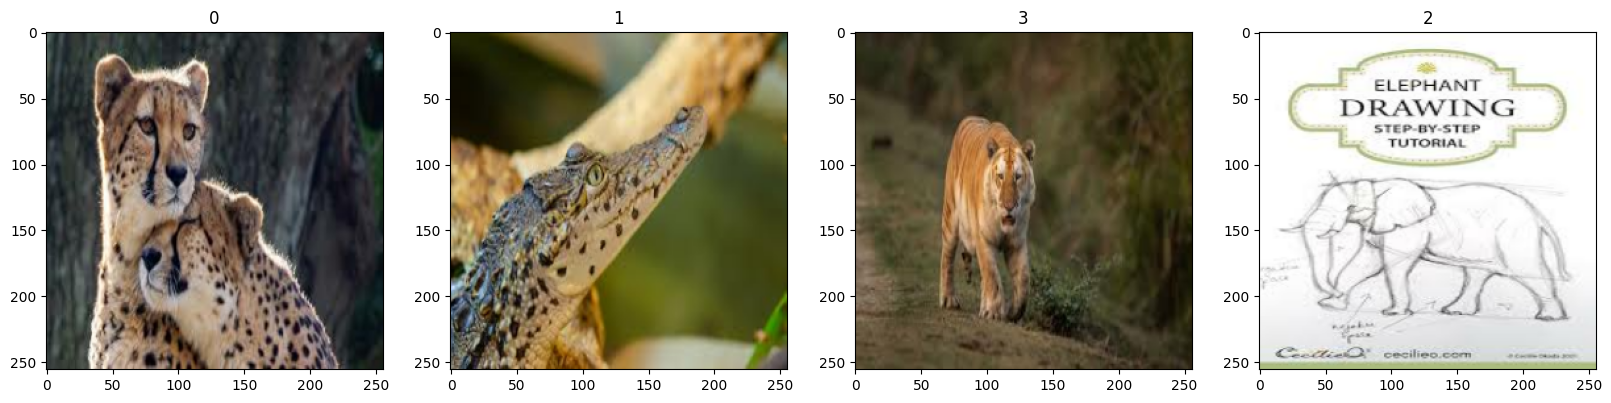

In [11]:
data = image_dataset_from_directory(
    r'C:\Users\Saurabh\Desktop\summer work\LS_ML\dataforweek3',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    batch_size=32
)



# Create a numpy iterator for data
data_iterator = data.as_numpy_iterator()

# Get a batch from the iterator
batch = data_iterator.next()

# Visualize the labels given to different animals
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [12]:
data = data.map(lambda x, y: (x / 255.0, y))


In [13]:
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = int(0.1 * len(data))

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes: elephants, tigers, cheetahs, and crocodiles
])


C:\Users\Saurabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3410 - loss: 2.6347 - val_accuracy: 0.4625 - val_loss: 1.2110
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.4844 - loss: 1.1428 - val_accuracy: 0.5250 - val_loss: 1.1038
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5801 - loss: 1.0215 - val_accuracy: 0.5625 - val_loss: 1.0189
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6613 - loss: 0.8186 - val_accuracy: 0.7563 - val_loss: 0.7500
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7923 - loss: 0.5542 - val_accuracy: 0.7875 - val_loss: 0.5686
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8562 - loss: 0.3802 - val_accuracy: 0.8188 - val_loss: 0.5858
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9470 - loss: 0.1623 - val_accuracy: 0.9000 - val_loss: 0.3406
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9602 - loss: 0.1099 - val_accuracy: 0.9187 - val_loss:

In [18]:
loss, accuracy = model.evaluate(test_data)
if accuracy >= 0.85:
    print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
    print(f"Try again, not enough accuracy! Your accuracy is {accuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.8757 - loss: 0.5073
Congratulations, CNN assignment complete!! Your accuracy is 0.8770949840545654
